# Breast Cancer Detection

__Challenge__

You belong to the data team at a local research hospital. You've been tasked with developing a means to help doctors diagnose breast cancer. You've been given data about east cells; where biopsied brit is benign (not harmful) or malignant (cancerous).

1. What features of a cell are the largest drivers of malignancy?

2. How would a physician use your product?

3. There is a non-zero cost in time and money to collect each feature about a given cell. How would you go about determining the most cost-effective method of detecting malignancy?

## Features
- Clump Thickness (1-10)        
- Uniformity of Cell Size (1-10)         
- Uniformity of Cell Shape (1-10)      
- Marginal Adhesion (1-10)               
- Single Epithelial Cell Size (1-10)     
- Bare Nuclei (1-10)                     
- Bland Chromatin (1-10)                 
- Normal Nucleoli (1-10)                 
- Mitoses (1-10)                         
- Class  (2 = benign, 4 = malignant)

## Strategies

This is a classifcation challenge. I will first explore the data to look for any abnormalities, clean it up and run it through some classification models. The metric I will optimize for is recall in order to reduce the number of false negatives when classifying whether a person has a malignant tumor or not.

# Import Data

In [8]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
#Import the data as a pandas df
bc_data = pd.read_csv("breast-cancer-wisconsin.txt", index_col='Index')
bc_data

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Index,,,,,,,,,,,
0,1241035,7,8,3,7,4,5,7,8,2,4
1,1107684,6,10,5,5,4,10,6,10,1,4
2,691628,8,6,4,10,10,1,3,5,1,4
3,1226612,7,5,6,3,3,8,7,4,1,4
4,1142706,5,10,10,10,6,10,6,5,2,4
...,...,...,...,...,...,...,...,...,...,...,...
15850,1169049,7,3,4,4,3,3,3,2,7,4
15851,1076352,3,6,4,10,3,3,3,4,1,4
15852,1107684,6,10,5,5,4,10,6,10,1,4


## Data Cleaning

In [48]:
# Check data for duplicated rows
bc_data.duplicated().value_counts()

True     15101
False      754
dtype: int64

That is a large number of duplicate rows in the dataset. Drop these

In [49]:
bc_data = bc_data.drop_duplicates()
bc_data

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Index,,,,,,,,,,,
0,1241035,7,8,3,7,4,5,7,8,2,4
1,1107684,6,10,5,5,4,10,6,10,1,4
2,691628,8,6,4,10,10,1,3,5,1,4
3,1226612,7,5,6,3,3,8,7,4,1,4
4,1142706,5,10,10,10,6,10,6,5,2,4
...,...,...,...,...,...,...,...,...,...,...,...
15717,752904,10,1,1,1,2,10,5,4,1,4
15720,1296025,4,1,2,1,2,1,1,1,1,2
15742,160296,5,8,8,10,5,10,8,10,3,4


In [25]:
# Determine null values in data set
bc_data.isna().sum()

ID                              0
Clump Thickness                 0
Uniformity of Cell Size        13
Uniformity of Cell Shape       13
Marginal Adhesion              13
Single Epithelial Cell Size    13
Bare Nuclei                    13
Bland Chromatin                13
Normal Nucleoli                13
Mitoses                        13
Class                          13
dtype: int64

In [50]:
#Drop the null values since there are very few and not likely to affect the model
bc_data = bc_data.dropna()
bc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 741 entries, 0 to 15779
Data columns (total 11 columns):
ID                             741 non-null int64
Clump Thickness                741 non-null int64
Uniformity of Cell Size        741 non-null object
Uniformity of Cell Shape       741 non-null object
Marginal Adhesion              741 non-null object
Single Epithelial Cell Size    741 non-null object
Bare Nuclei                    741 non-null object
Bland Chromatin                741 non-null object
Normal Nucleoli                741 non-null object
Mitoses                        741 non-null object
Class                          741 non-null object
dtypes: int64(2), object(9)
memory usage: 69.5+ KB


In [51]:
uniquevalues = bc_data.nunique()
print('Count of unique values in each column :')
print(uniquevalues)

Count of unique values in each column :
ID                             666
Clump Thickness                 17
Uniformity of Cell Size         21
Uniformity of Cell Shape        19
Marginal Adhesion               20
Single Epithelial Cell Size     19
Bare Nuclei                     19
Bland Chromatin                 19
Normal Nucleoli                 22
Mitoses                         14
Class                            7
dtype: int64


In [41]:
bc_data['Class'].unique()

array(['4', '2', 'No idea', '40', '#', '?', '20'], dtype=object)

Alot of the value in the cells are non-regular. Should range from 1-10 but many multiple of 10s are found. These might possibly have been entered incorrectly and should actually be divided by 10 for true values.

It might be easier to also remove the 'no idea', # and ? values as I cant make assumptions about them

In [242]:
removevalues = ["?", "No idea", "#"]
for col in bc_data.columns[1:]:
    bc_data = bc_data[~bc_data[col].isin(removevalues)].copy()
bc_data2 = bc_data.copy()

In [222]:
def fix_col(bc_data, col):
    '''this function divides columns <10 by 10'''
    bc_data[col] = bc_data[col].astype(int)
    bc_data[col] = bc_data[col].apply(lambda x: x//10 if x>10 else x)
    bc_data[col] = bc_data[col].astype(int)
    return(bc_data)

In [243]:
for col in bc_data2:
    bc_data2 = fix_col(bc_data2, col)
    
#Change  Class bengin and malignant 2 and 4 to 0 and 1
bc_data2.Class  = bc_data2.Class.map({2:0, 4:1})

#Drop ID column prior to entering data into model
bc_data2 = bc_data2.drop("ID", axis=1)
bc_data2

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Index,,,,,,,,,,
0,7,8,3,7,4,5,7,8,2,1
1,6,10,5,5,4,10,6,10,1,1
2,8,6,4,10,10,1,3,5,1,1
3,7,5,6,3,3,8,7,4,1,1
4,5,10,10,10,6,10,6,5,2,1
...,...,...,...,...,...,...,...,...,...,...
15717,10,1,1,1,2,10,5,4,1,1
15720,4,1,2,1,2,1,1,1,1,0
15742,5,8,8,10,5,10,8,10,3,1


# Exploratory Analysis

In [244]:
bc_data2.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000
mean,4.530259,3.256484,3.304035,2.951009,3.237752,3.665706,3.475504,2.998559,1.825648,0.363112
std,2.840357,3.105259,3.005250,2.934675,2.191342,3.684616,2.445682,3.123481,2.160883,0.481244
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,7.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


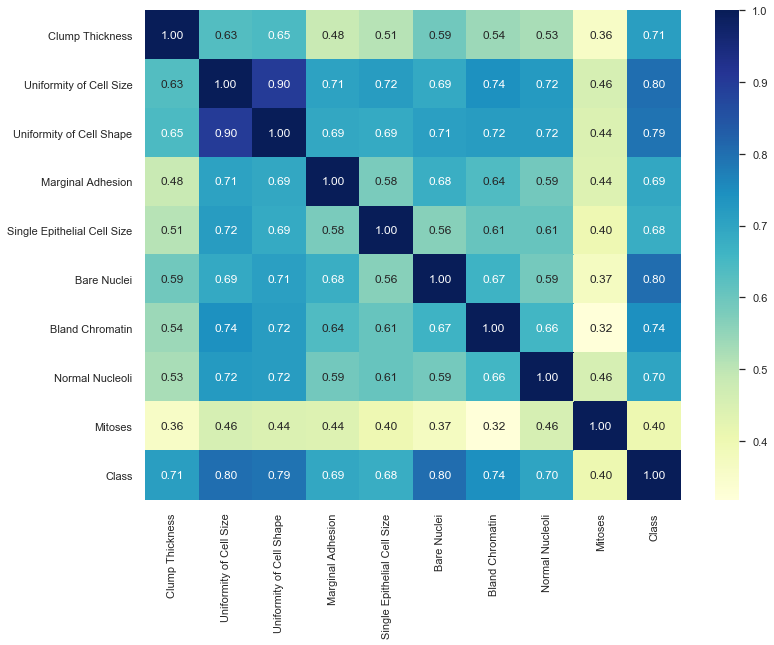

In [226]:
#Check for correlation among features
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(bc_data2.corr(method='pearson'), annot=True, fmt='0.2f', cmap="YlGnBu");

'Uniformity of Cell Shape' and 'Uniformity of Cell Size' are highly correlated so one will need to be dropped when performing the model

The total number of malignant samples is 252 (36.31%) and the total number of benign samples is 442 (63.69%).


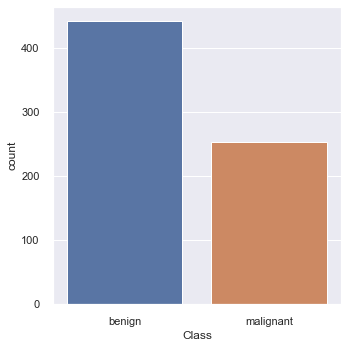

In [245]:
#Now check how many malignant vs benign tumors are in the Class feature

ben_tot = len(bc_data2[bc_data2.Class == 0].index)
mal_tot = len(bc_data2[bc_data2.Class  == 1].index)
ben_per = ben_tot / (ben_tot + mal_tot) * 100
mal_per = mal_tot / (ben_tot + mal_tot) * 100


fig, ax = plt.subplots(figsize=(5, 5))
disp = sns.countplot(data=bc_data2, x='Class')
plt.xticks(np.arange(2), ('benign', 'malignant'))
fig.tight_layout()
print("The total number of malignant samples is %d (%.2f%%) and the total number of benign samples is %d (%.2f%%)." 
      %(mal_tot, mal_per, ben_tot, ben_per))

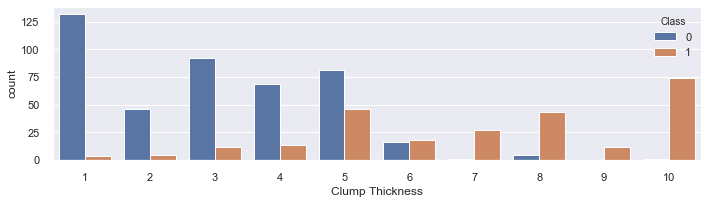

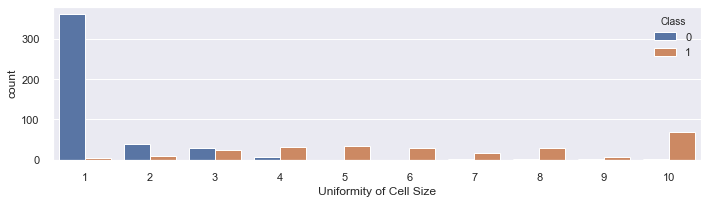

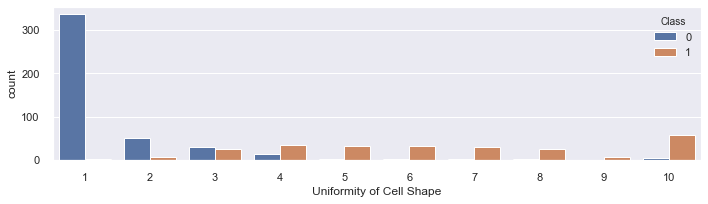

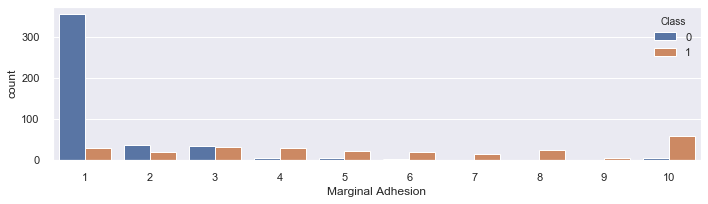

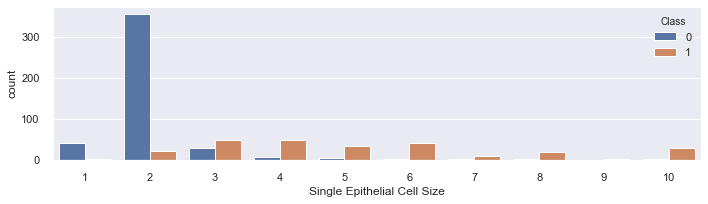

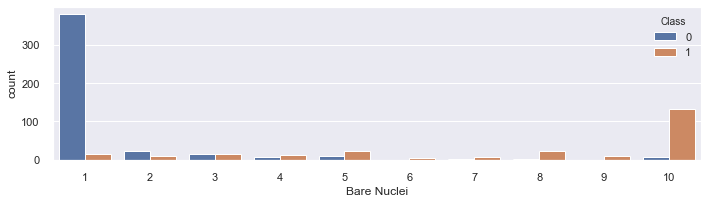

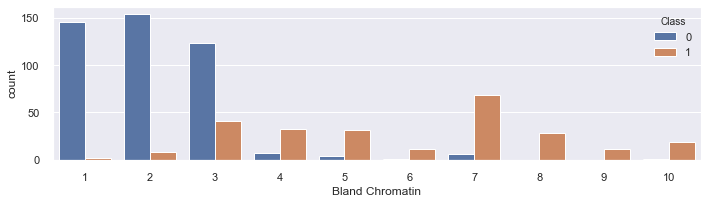

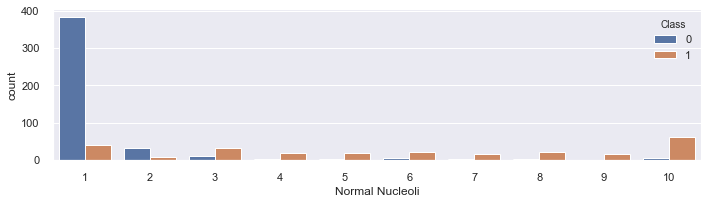

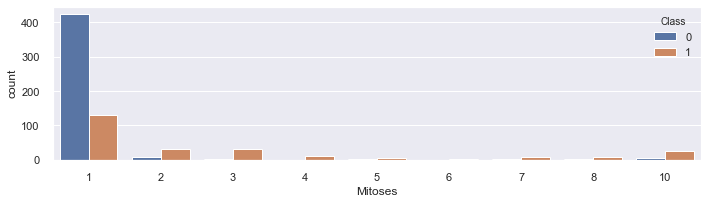

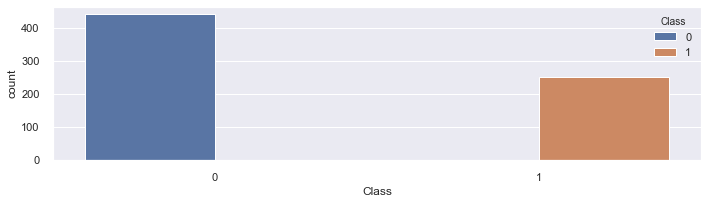

In [247]:
for col in bc_data2:
    fig, ax = plt.subplots(figsize=(10, 3))
    sns.countplot(data=bc_data2, x=col, hue = 'Class')
    fig.tight_layout()

The larger the size of the features, the more likely the tumor will be of the malignant class

In [117]:
#Drop due to high correlation with another feature
model_data = bc_data2.drop('Uniformity of Cell Shape', axis=1)

# Models

__Recall__ is the metric I will use to determine model performance. The rational being is that I want to reduce the number of false negatives. With cancer it is important to capture all who are sick so that they can see treatment. Diagnosing a few false positives with cancer is less damaging than missing those that have it and dont seek treatment

In [248]:
# Choose training and test set
X = model_data.drop('Class', axis=1) # contains features
y = model_data["Class"] # target

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=100)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Logistic Regression

[[115   3]
 [  4  52]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       118
           1       0.95      0.93      0.94        56

    accuracy                           0.96       174
   macro avg       0.96      0.95      0.95       174
weighted avg       0.96      0.96      0.96       174

Recall: 0.9286
Accuracy: 0.9598
Precision: 0.9455


Text(0.5, 1.0, 'Confusion Matrix')

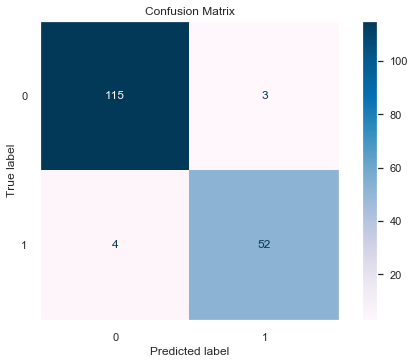

In [249]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

""""I went with l2 since the dataset isnt large nor does it contain many features. 
    I also wanted to reduce any multicolinearity"""

logmodel = LogisticRegression(random_state=0, max_iter=100,
                                solver='liblinear', penalty='l2')
logmodel.fit(X_train, y_train)
y_pred = logmodel.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Recall: %.4f' %metrics.recall_score(y_test, y_pred))
print('Accuracy: %.4f' %logmodel.score(X_test, y_test))
print('Precision: %.4f' %metrics.precision_score(y_test, y_pred))

disp = plot_confusion_matrix(logmodel, X_test, y_test, values_format='d', cmap=plt.cm.PuBu, ax=None)
plt.grid(False)
disp.ax_.set_title('Confusion Matrix')

### Feature Importance

                          name     coeff
7                      Mitoses -0.116661
1      Uniformity of Cell Size  0.391631
6              Normal Nucleoli  0.482160
2            Marginal Adhesion  0.529638
3  Single Epithelial Cell Size  0.773107
5              Bland Chromatin  0.957246
4                  Bare Nuclei  0.962634
0              Clump Thickness  1.611836


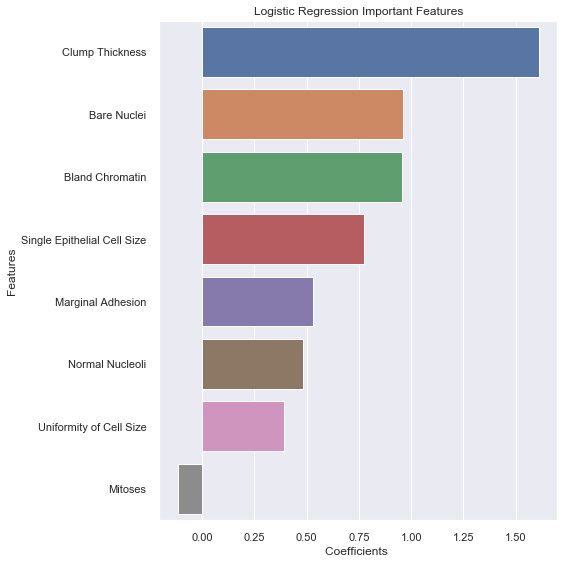

In [199]:
features = X.columns

logfeat= pd.DataFrame()
logfeat['name'] = features
logfeat['coeff'] = logmodel.coef_[0]
print(logfeat.sort_values(by=['coeff']))

fig = plt.figure(figsize=(8,8))
ax = sns.barplot(x='coeff', y='name', data=logfeat.sort_values(by='coeff', ascending=False))
ax.set_xlabel('Coefficients ')
ax.set_ylabel('Features')
ax.set_title('Logistic Regression Important Features')
fig.tight_layout()

### ROC Curve

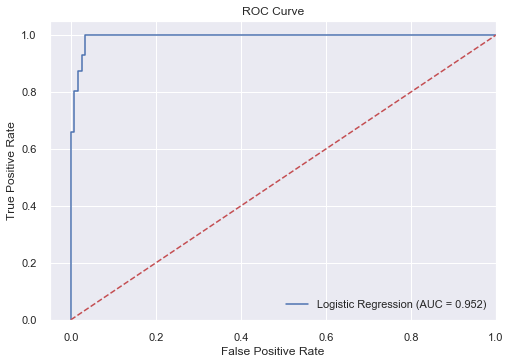

In [218]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (AUC = %0.3f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

## Random Forest

[[114   4]
 [  2  54]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       118
           1       0.93      0.96      0.95        56

    accuracy                           0.97       174
   macro avg       0.96      0.97      0.96       174
weighted avg       0.97      0.97      0.97       174

Recall: 0.9643
Accuracy: 0.9598
Precision: 0.9310


Text(0.5, 1.0, 'Confusion Matrix')

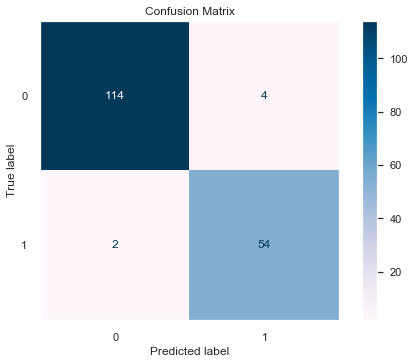

In [213]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=1000)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Recall: %.4f' %metrics.recall_score(y_test, y_pred))
print('Accuracy: %.4f' %logmodel.score(X_test, y_test))
print('Precision: %.4f' %metrics.precision_score(y_test, y_pred))

cm = plot_confusion_matrix(clf, X_test, y_test, values_format='d', cmap=plt.cm.PuBu, ax=None)
plt.grid(False)
cm.ax_.set_title('Confusion Matrix')

### Feature Importance

Text(0.5, 1.0, 'Random Forest Important Features')

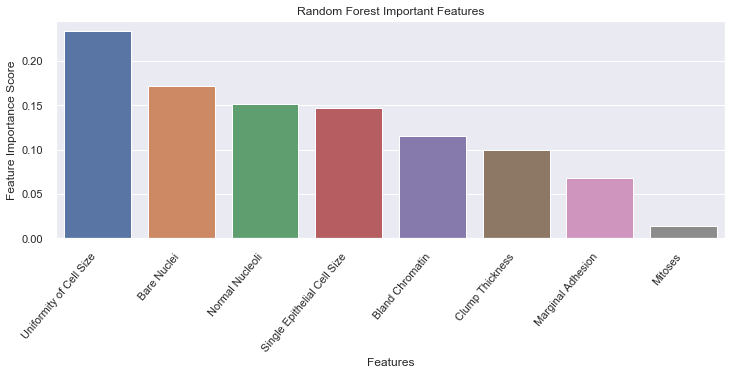

In [251]:
rf_feat= pd.Series(clf.feature_importances_,index=features).sort_values(ascending=False)
plt.figure(figsize=(12,4))
ax = sns.barplot(y=rf_feat, x=rf_feat.index)

plt.xlabel('Features')
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha='right')
plt.ylabel('Feature Importance Score')
plt.title('Random Forest Important Features')

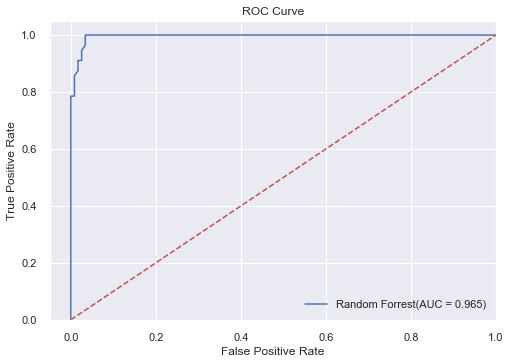

In [219]:
rf_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(rf_fpr, rf_tpr, label='Random Forrest(AUC = %0.3f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Model Comparison

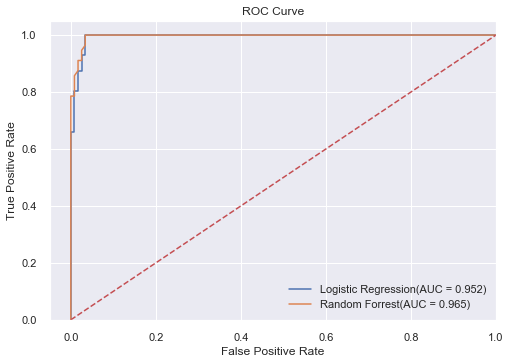

In [220]:
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression(AUC = %0.3f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forrest(AUC = %0.3f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Summary

__1. What features of a cell are the largest drivers of malignancy?__

Using a Random Forrest model, the top 5 features are
* Uniformity of Cell size
* Bare nuclei
* Single epithelial size
* Normal nucleoli
* Bland chromatin


With a Logistic Regression model, they were:
* Clump thickness
* Bare nuclei
* Bland chromatin
* Single epithelial size
* Marginal Adhesion

The two models performed very similarly with high Recall scores but Random Forest slightly outperformed the Logistic Regression.  I was able to get a Recall score of 0.964 and AUC of 0.965 with Random Forrest.

__2. How would a physician use this product?__

The important features are factors that a physician should look for when examining a patient as these are informative to classify a tumor as benign vs malignant

__3. How would you go about determining the most cost-effective method of detecting malignancy?__

I think the  thing to do is determine what features a physician would want to pursue. Since the Random Forest model has a higher recall score, uniformity of cell size is  most indicative of class so that should be the first one evaluated and from there more features can be added with a threshold set to determine whether additional features impact model performance in a significant way

__Additional insights__

This dataset contained a large number of duplicated values that I can't explain. Further exploring that might uncover something valuable. Different features were more important between the different models. Particularly clump thickness did not rank high on the Random Forrest.